<a href="https://colab.research.google.com/github/mohamedtal/PFE2021/blob/main/18_12_2020_AutoKerasMnistExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#in order to install it, it reqiures python3 / tensorflow > 2.1
!pip3 install autokeras

In [ ]:
# import code
!pip install autokeras
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

     |████████████████████████████████| 174kB 20.1MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=03f4a4c4fe66cca25876ee7269e285f6ed61b5f096b012cc2b7f05ea7637c3d6
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=820a3f72bc526959a418fae5c070ef597ac55425b2de2b5d231643e6818e296b
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=2)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=5)

Trial 2 Complete [00h 44m 18s]
val_loss: 0.1932963728904724

Best val_loss So Far: 0.043017126619815826
Total elapsed time: 00h 44m 52s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2947 - accuracy: 0.9101
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0791 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0629 - accuracy: 0.9817
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9858
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [ ]:
# initialize the ImageClassifier
# as we are testing in a small dataset we initialize max_trials=1, sinon make it bigger as you can

input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    # Only search ResNet architectures. you can specify as much as you can sinon test all the architectures
    #block_type="resnet",
    # Normalize the dataset.
    normalize=True,
    # Do not do data augmentation.
    augment=False,
)(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=1)
clf.fit(x_train, y_train, epochs=5,verbose=True)

Trial 4 Complete [00h 11m 27s]
val_loss: 1.1069425344467163

Best val_loss So Far: 0.04904280975461006
Total elapsed time: 00h 46m 24s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
 264/1875 [===>..........................] - ETA: 2:21 - loss: 1.3274 - accuracy: 0.6714

In [ ]:
# fit the model
# the validation data taked auto 20% from the end but we can do it manually (voire documentation)
# evaluate the model
print(clf.evaluate(x_test,y_test))

313/313 [==============================] - 4s 10ms/step - loss: 0.0532 - accuracy: 0.9841
[0.05319766327738762, 0.9840999841690063]


In [ ]:
# Export as a Keras Model.
model = clf.export_model()
model.save("model_autokeras.h5")


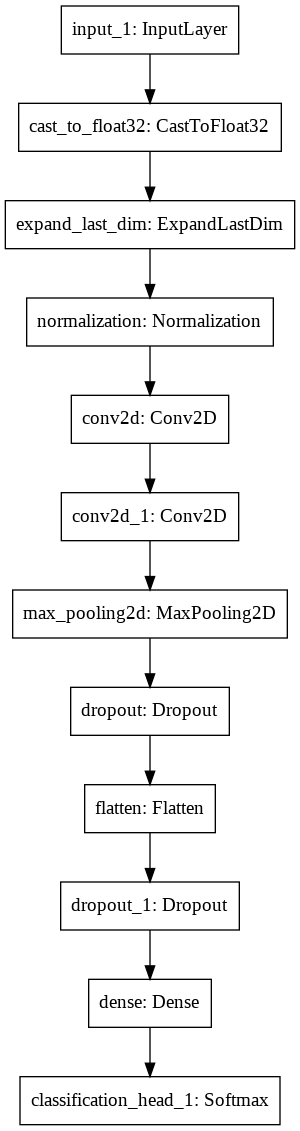

In [ ]:
from tensorflow.keras.models import load_model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
predicted_y = loaded_model.predict(tf.expand_dims(x_test, -1))
print(predicted_y)